## Multivariate Linear Regression

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

# use seaborn for plot defaults
# this can be safely commented out
import seaborn; seaborn.set()

### The dataset

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [23]:
data = np.genfromtxt('ex1data2.txt', delimiter=',')

X = data[:,[0,1]] # dataset features
y = data[:, 2] # dataset labels

print(min(X[:,0]), max(X[:,0]))
print(min(X[:,1]), max(X[:,1]))
print(min(y), max(y))

852.0 4478.0
1.0 5.0
169900.0 699900.0


### Visualizing the dataset

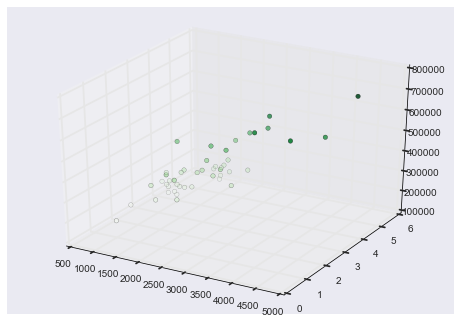

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zdata = y
xdata = X[:,0]
ydata = X[:,1]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### Feature Scaling

The maximum value of size if almost 1000 times as large as the maximum value of number of bedrooms feature scaling can make gradient descent converge more quickly.

In [25]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X) 
X_scaled = np.c_[np.ones(len(X_scaled)), X_scaled] # add a column of 1 to feature matrix

When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations.

In [26]:
print(scaler.mean_)
print(scaler.std_)

[ 2000.68085106     3.17021277]
[  7.86202619e+02   7.52842809e-01]


### Initializing the Parameters

In [27]:
theta = np.zeros(3)
iterations = 1500
alpha = 0.01

### Gradient Descent

In [28]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(X)
    X_trans = np.transpose(X)
    J_history = []
    for i in range(num_iterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(X_trans, loss) / m
        theta = theta - alpha * gradient
        J_history.append(cost)
    return theta, J_history

In [29]:
theta, J_history = gradient_descent(X_scaled, y, theta, alpha, iterations);

#### J($\theta$) History

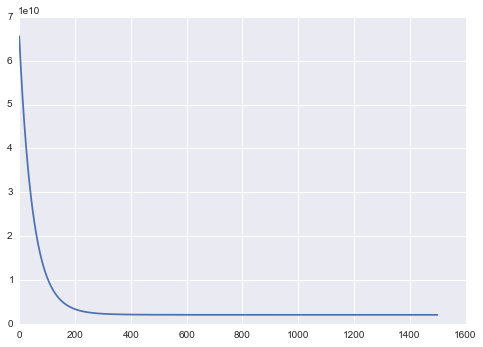

In [19]:
plt.plot(range(0, len(J_history)), J_history);

To generate new predictions we must remember to apply the feature normalization to new examples. The predicted price for a 1650 sqft 4 bedroom house would be the following.

In [20]:
example = np.array([1650.0, 4.0])
example_scaled = scaler.transform(example)
example_scaled = np.insert(example_scaled, 0, 1) #prepend 1 in column 0
prediction = np.dot(example_scaled, theta)
print(prediction)

284463.709172


### Visualizing the Regression Plane

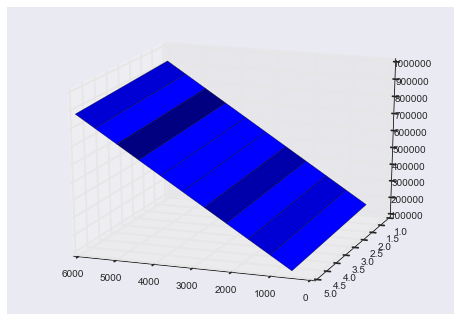

In [21]:
"""
TODO: This is not working as intended...
"""

xx, yy = np.meshgrid(np.linspace(500, 6000, num=100), np.linspace(1, 5, num=5))

p_vals = np.zeros(xx.shape)

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        p = scaler.transform(np.array([xx[i,j], yy[i,j]]))
        p = np.insert(p, 0, 1)
        p_vals[i, j] = np.dot(p, theta)

        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, p_vals);
ax.view_init(20, 110)